## HEART DISEASE PREDICTION
### 215229113 & 215229138

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load Dataset

In [2]:
data = pd.read_csv("heart.csv")

### Examine dataset
 

Read the dataset
dtypes
isnull
describe
get numeric

In [3]:
data.shape

(303, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Exploration

In [8]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

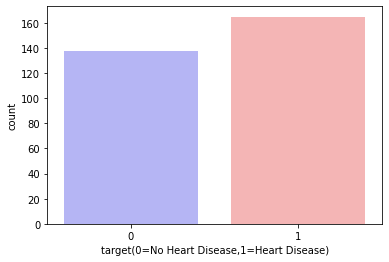

In [10]:
sns.countplot(x='target',data=data,palette='bwr')
plt.xlabel("target(0=No Heart Disease,1=Heart Disease)")
plt.show

In [11]:
countnoHD=len(data[data.target==0])
counthaveHD=len(data[data.target==1])
print('Percentage of Patients not having Heart Disease:{:.2f}%'.format((countnoHD/(len(data.target))*100)))
print('Percentage of Patients having Heart Disease:{:.2f}%'.format((counthaveHD/(len(data.target))*100)))

Percentage of Patients not having Heart Disease:45.54%
Percentage of Patients having Heart Disease:54.46%


<function matplotlib.pyplot.show(close=None, block=None)>

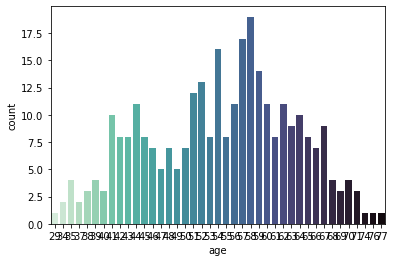

In [12]:
sns.countplot(x='age',data=data,palette='mako_r')
plt.show

In [13]:
old=len(data[data.age>=30])
teen=len(data[data.age<=29])
print('Percentage of old Patients having Heart Disease:{:.2f}%'.format((old/(len(data.age))*100)))
print('Percentage of teen Patients having Heart Disease:{:.2f}%'.format((teen/(len(data.age))*100)))

Percentage of old Patients having Heart Disease:99.67%
Percentage of teen Patients having Heart Disease:0.33%


In [14]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


### Train  andTest

In [15]:
X=data.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
y=data.pop('target')

### Importing sklearn

In [17]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler() 
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

### Create instance class & Fit data

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(X_train_ss,y_train)
lr_model

LogisticRegression()

### Predict Data

In [20]:
lr_y_pred=lr_model.predict(X_test_ss)
lr_y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

### Accuracy Score:

In [21]:
from sklearn.metrics import accuracy_score
log_acc=accuracy_score(y_test,lr_y_pred)
log_acc

0.7631578947368421

### LinearSVC

In [22]:
from sklearn.svm import LinearSVC
LinSVC=LinearSVC()
model_SVC=LinSVC.fit(X_train_ss,y_train)
LinSVC_y_pred=model_SVC.predict(X_test_ss)
LinSVC_acc=accuracy_score(y_test,LinSVC_y_pred)
LinSVC_acc

0.7631578947368421

### KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train_ss,y_train)
knn_y_pred=knn_model.predict(X_test_ss)
knn_acc=accuracy_score(y_test,knn_y_pred)
knn_acc

0.7631578947368421

### Confusion Matrics

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,lr_y_pred)
cm

array([[23, 12],
       [ 6, 35]], dtype=int64)

Text(0.5, 1.0, 'accuracy Score:0.7631578947368421')

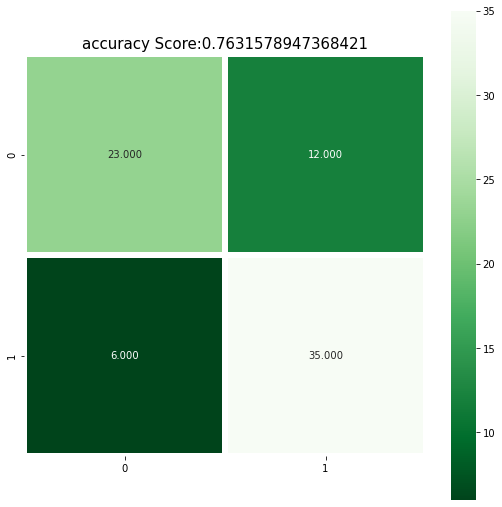

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=5,square=True,cmap='Greens_r')
allsampletitle="accuracy Score:{0}".format(log_acc)
plt.title(allsampletitle,size=15)

### Recall Score

In [26]:
from sklearn import metrics
metrics.recall_score(y_test,lr_y_pred)

0.8536585365853658

### Precision Score

In [66]:
metrics.precision_score(y_test,lr_y_pred)

0.7446808510638298

### Classification_report

In [68]:
metrics.classification_report(y_test,lr_y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.66      0.72        35\n           1       0.74      0.85      0.80        41\n\n    accuracy                           0.76        76\n   macro avg       0.77      0.76      0.76        76\nweighted avg       0.77      0.76      0.76        76\n'

In [28]:
import pickle

In [29]:
pickle.dump(lr_model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
